In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('bmh')

In [3]:
df = pd.read_csv('fe1half1.csv')

In [4]:
def rate0(df, d, s):
    dt1 = df.time[s + d] - df.time[s]
    dt2 = df.time[s + 2 * d] - df.time[s + d]
#     if dt1 != dt2:
#         warnings.warn("Unequally spaced data")
    
    c0 = df.Pressure[s]
    c1 = df.Pressure[s + d]
    c2 = df.Pressure[s + 2 * d]
    
#     return (-3 * c0 + 4 * c1 - c2) / (2 * dt1)
    return (c2 - c0) / (dt1 + dt2)

In [5]:
files = [
    ("fe1", (1, 2, 3)),
    ("fe1half", (0, 1, 2)),
    ("fe2", (0, 1, 2, 3, 4)),
    ("fe2half", (0, 1, 2)),
    ("fe3", (0, 1, 3)),
    ("fe3half", (0, 1, 2)),
    ("fe4", (0, 1, 2, 4))
]

In [6]:
rates_avg = []
rates_dev = []
vs = []

v = 1
d = 120
s = 90

for fname, fnums in files:
    rates = []
    for fnum in fnums:
        df = pd.read_csv(f"{fname}{fnum}.csv")
        try:
            rate = rate0(df, d=d, s=s)
            if rate > 0:
                rates.append(rate)
        except:
            pass
    rates = pd.Series(rates)
    
    print(v)
    print(pd.Series(rates).describe())
    print()
    
    rates_avg.append(rates.mean())
    rates_dev.append(rates.std())
    vs.append(v)
    
    v += 0.5

vs = np.array(vs)
rates_avg = np.array(rates_avg)
rates_dev = np.array(rates_dev)


1
count    3.000000
mean     0.048267
std      0.012201
min      0.034400
25%      0.043724
50%      0.053049
75%      0.055201
max      0.057353
dtype: float64

1.5
count    3.000000
mean     0.110850
std      0.000952
min      0.109904
25%      0.110372
50%      0.110841
75%      0.111324
max      0.111807
dtype: float64

2.0
count    5.000000
mean     0.100758
std      0.051546
min      0.043505
25%      0.064994
50%      0.107269
75%      0.110196
max      0.177825
dtype: float64

2.5
count    3.000000
mean     0.181260
std      0.022632
min      0.161518
25%      0.168910
50%      0.176303
75%      0.191131
max      0.205960
dtype: float64

3.0
count    3.000000
mean     0.247932
std      0.006830
min      0.240447
25%      0.244985
50%      0.249523
75%      0.251675
max      0.253827
dtype: float64

3.5
count    3.000000
mean     0.277306
std      0.010321
min      0.267586
25%      0.271890
50%      0.276194
75%      0.282166
max      0.288139
dtype: float64

4.0
count    2.000

<ErrorbarContainer object of 3 artists>

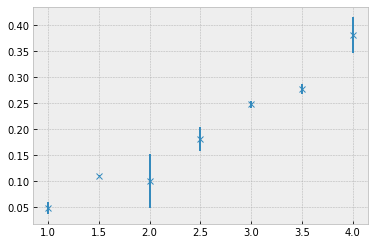

In [7]:
plt.errorbar(vs, rates_avg, yerr=rates_dev, fmt='x')

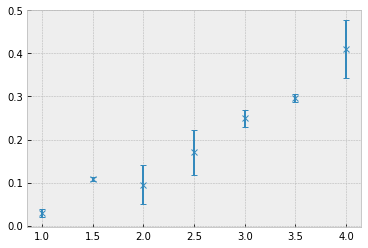

In [8]:
rates_avg = []
rates_dev = []
vs = []

v = 1.0
d = 60
s = 60

for fname, fnums in files:
    rates = []
    for fnum in fnums:
        df = pd.read_csv(f"{fname}{fnum}.csv")

        for t in range(1, len(df.time)):
            rate_at_t = (df.Pressure[t] - df.Pressure[t - 1]) / (df.time[t] - df.time[t - 1])
            if rate_at_t >= 1.2:
                df = pd.DataFrame(data={
                    'time': list(df.time[t:] - df.time[t]),
                    'Pressure': list(df.Pressure[t:]),
                    'Temperature': list(df.Temperature[t:])
                })
                break
        else:
            continue

        try:
            rate = rate0(df, d=d, s=s)

            rates.append(rate)
        except:
            pass
    rates = pd.Series(rates)
        
    rates_avg.append(rates.mean())
    rates_dev.append(rates.std())
    vs.append(v)
    
    v += 0.5

vs = np.array(vs)
rates_avg = np.array(rates_avg)
rates_dev = np.array(rates_dev)

plt.errorbar(vs, rates_avg, yerr=rates_dev, fmt='x', capsize=3.0)
plt.show()

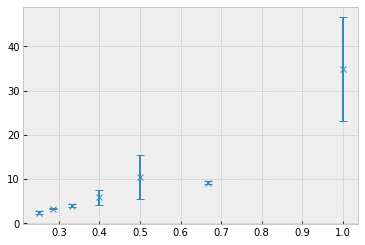

In [9]:
plt.errorbar(1/vs, 1/rates_avg, yerr=rates_dev/rates_avg / rates_avg, fmt='x', capsize=4.0);

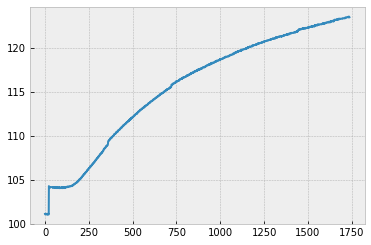

In [10]:
df = pd.read_csv('fe13.csv')
plt.plot(df.Pressure)
